In [2]:

import tweepy
from tweepy import StreamListener
from tweepy import Stream
import time
import pandas as pd
import json



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)




In [3]:
'''class CustomStreamListener(StreamListener):

    def on_status(self, status): 
        print( status.author.screen_name, status.created_at, status.text)
        with open('file.txt', 'w') as f: 
                f.write('Author,Date,Text')
                
                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))


    def on_error(self, status_code):
        print ( sys.stderr, 'Encountered error with status code:', status_code)
        return True # Don't kill the stream

    def on_timeout(self):
        print ( sys.stderr, 'Timeout...')
        return True # Don't kill the stream




streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
streamingAPI.filter(track=['NocheDeLosMuseos'])
'''

"class CustomStreamListener(StreamListener):\n\n    def on_status(self, status): \n        print( status.author.screen_name, status.created_at, status.text)\n        with open('file.txt', 'w') as f: \n                f.write('Author,Date,Text')\n                \n                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))\n\n\n    def on_error(self, status_code):\n        print ( sys.stderr, 'Encountered error with status code:', status_code)\n        return True # Don't kill the stream\n\n    def on_timeout(self):\n        print ( sys.stderr, 'Timeout...')\n        return True # Don't kill the stream\n\n\n\n\nstreamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())\nstreamingAPI.filter(track=['NocheDeLosMuseos'])\n"

In [66]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


KeyboardInterrupt: 

In [67]:
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

In [ ]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="NocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('NocheDeLosMuseos2.json', 'w'))

Para cada tweet vamos a levantar
Autor
Id Autor
Texto
Autores de los retweets
Autores de los me gusta
Autores de los comentarios
fecha


In [84]:
for idtweet in data:
    print(data[idtweet]["retweets"],data[idtweet]["autor"])

[] ViveroFacundo
[] campoadentro16
[] gungurfinearts
[] JcVazquez58
[] SmmMaris
[[3412844729, 281051064]] BCNArgentina
[] chortp
[] eneroman_nora
[] Indembarg
[] ConamMutual
[[376723885, 216106179], [1590956791, 216106179], [851309247887441920, 216106179], [745316089500999680, 216106179], [2714777790, 216106179]] CulturaNacionAR
[] manuelsilsan
[] eneroman_nora
[] miguelgracioso2
[] eneroman_nora
[] DONJULIO400
[] SebZabs
[] Angel4029F
[] karlof11
[] Silvanabanana2
[] silvinanoguera
[[3412844729, 281051064]] BCNArgentina
[] MuseoRoca
[] MuseoDecorativo
[] Adrian80596816
[] silvana_luvera
[] miki_kusanagi
[] Lolenico
[] eneroman_nora
[] C_COM_5
[] Lore__Marquez
[] Claudia65803029
[] sebakatz
[[166148237, 983458110827323393]] MuseoOriental
[] PeronistasUnidx
[] maferrari55
[] Indembarg
[] SmmMaris
[] beatrizbostera3
[] LSpoliansky
[] mamriverplate
[] sebakatz
[] comoalilive
[] sebakatz
[] eneroman_nora
[] Lore__Marquez
[[1250537521, 281051064]] BCNArgentina
[] RcA1_2Prensa
[] Arturo31674

In [85]:
print(data)

{'1062030927331819525': {'fecha': '2018-11-12 17:14:39', 'texto': 'RT @FlacoStereo: GUSTAVO CERATI | \n\nSu acta original de nacimiento, 11 de Agosto de 1959, exhibida en el Registro Civil de la ciudad de Bue…', 'retweets': [], 'autor': 'ViveroFacundo', 'autorid': 937742727806144514}, '1062033180528705540': {'fecha': '2018-11-12 17:23:36', 'texto': 'RT @MindefArg: El fin de semana vivimos #LaNocheDeLosMuseos junto a los Regimientos de Granaderos y de Patricios https://t.co/Z1XATaT01y', 'retweets': [], 'autor': 'campoadentro16', 'autorid': 743629350537408512}, '1062044514733383680': {'fecha': '2018-11-12 18:08:38', 'texto': '#LaNocheDeLosMuseos 🌙\n¡Gracias a todxs lxs que nos acompañaron el sábado!\nLa presentación a cargo de Güngur Arts fu… https://t.co/2zxou9gSlp', 'retweets': [], 'autor': 'gungurfinearts', 'autorid': 154285638}, '1062035136039006209': {'fecha': '2018-11-12 17:31:22', 'texto': 'RT @AgroindustriaAR: La historia, la música, la innovación y los sabores del campo argentin

## Grafo desde la cuenta NocheMuseos


In [13]:
def checkFollow(usa,usb):
    relation = api.show_friendship(source_id=usa, target_id=usb)
    if relation[0].following: #I'm not sure if it should be "target" or "source" here
        return True
    return False

In [15]:
#archivo=open('redegodelosmuseos.txt', 'w')
i=0
cuenta="NocheMuseos"
followers = api.followers_ids(cuenta,n=10)
#friends = api.friends_ids(cuenta)
#nodos=[]
aristas=[]

#len(followers)
#for follower in followers: 
#    nodos.append(API.)


for nodo1 in followers:
    for nodo2 in followers:
        if nodo1 != nodo2:
            if checkFollow(nodo1,nodo2):
                nuevoenlace=[nodo1, nodo2]
                aristas.append(nuevoenlace)
                print(nuevoenlace)

#print(followers)
#for follower in followers:    
#    aristas.append(follower.screen_name) 
#
#    try:
#        followers1 = api.followers(follower.screen_name,n=1000)    # seguidores de cada amigo la noche de los museos
#    except:
#        print ('Fallo')
#        pass
#    for follower1 in followers1:
#        aristas.append(follower1.screen_name)


KeyboardInterrupt: 

### Armar el grafo

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

In [89]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [95]:
G=nx.Graph()
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[3412844729, 281051064]
[376723885, 216106179]
[1590956791, 216106179]
[851309247887441920, 216106179]
[745316089500999680, 216106179]
[2714777790, 216106179]
[3412844729, 281051064]
[166148237, 983458110827323393]
[1250537521, 281051064]
[3412844729, 281051064]
[3412844729, 281051064]
[3412844729, 281051064]
67


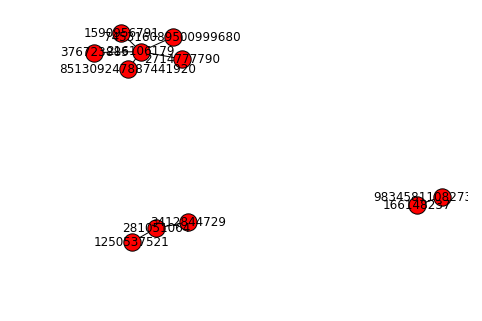

In [91]:
nx.draw(G, with_labels=True)
plt.show()